In [1]:
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob

In [2]:
def convert_to_array_image(filename):
    Pic = Image.open(filename)#.convert('L')
    image_sequence = Pic.getdata()
    Pic.close()
    return np.array(image_sequence)

In [3]:
#-- Classification classes:
# C0 for events in standard model
# C1 for events of new physics

#-- Filenames for 0 class (background noise as physics from standard model):
#-- Process: tth, tttt, ttbb/h
#-- 'bkg1.csv', 'bkg2.csv', 'bkg3.csv'
fname_C0 = 'bkg1'

#-- Filenames for 1 class (positive signal as physics beyond standard model):
#-- Process: M(z')=250 GeV, M(z')=350 GeV, M(z')=1000 GeV
#-- 'signal250.csv', 'signal350.csv', 'signal1000.csv'
fname_C1 = 'signal250'

#-- Folder for images:
#-- 'C0_bkg1/', 'C0_bkg2/', 'C0_bkg3/' -> Class 0
#-- 'C1_signal250/', 'C1_signal350/', 'C1_signal1000/', 'C1_signal3000/'' -> Class 1
folder_C0 = 'C0_'+fname_C0+'/'
folder_C1 = 'C1_'+fname_C1+'/'

#-- Name for images:
figname_C0 = 'C0_'+fname_C0
figname_C1 = 'C1_'+fname_C1

#-- Counts total images in each folder as a total number of events for analysis (for each class 0 or 1):
Tot_Events_C0 = len(glob.glob1(folder_C0, '*.png'))
Tot_Events_C1 = len(glob.glob1(folder_C1, '*.png'))

['EPS', 'RGB', {'PS-Adobe': '3.0 EPSF-3.0', 'Title': 'C0_bkg1_Event_9.eps', 'Creator': 'Matplotlib v3.5.1, https://matplotlib.org/', 'CreationDate': 'Thu May 19 12:35:12 2022', 'Orientation': 'portrait', 'BoundingBox': '138 295 474 497', 'HiResBoundingBox': '138.600000 295.560000 473.400000 496.440000'}, None] (336, 202)


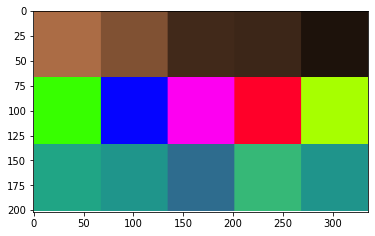

,R,G,B
0,255,255,255
1,171,108,69
2,171,108,69
3,171,108,69
4,171,108,69
...,...,...,...
67867,255,255,255
67868,255,255,255
67869,255,255,255
67870,255,255,255


In [6]:
Event = 8
fig_name_C0 = folder_C0+figname_C0+'_Event_'+str(Event+1)+'.eps'
fig_name_C1 = folder_C1+figname_C1+'_Event_'+str(Event+1)+'.eps'

Pic_C0 = Image.open(fig_name_C0)#.convert('L')
Pic_C0_parameters = [Pic_C0.format, Pic_C0.mode, Pic_C0.info, Pic_C0.palette]
print(Pic_C0_parameters, Pic_C0.size)
#Pic_C0.show()
color_mode = list(Pic_C0.mode) # L or RGB or RGBA or CMYK mode colors for image

plt.imshow(Pic_C0)
plt.show()
Pic_C0.close()

Pic_C0_array = convert_to_array_image(fig_name_C0)
data = pd.DataFrame(Pic_C0_array, columns=color_mode)
#data.drop_duplicates(inplace=True)
#data.reset_index(inplace=True)
#data.drop(['index'], axis=1, inplace=True)

#plt.imshow(data.drop(['A'], axis=1))
#plt.show()

data

In [7]:
import glob,os

paths = glob.glob(fig_name_C0)#os.path.join(folder_C0, '*.png'))
im = list(map(Image.open, paths))
for  obj in im:
    pixels = pd.DataFrame(np.array(obj.getdata()), columns=color_mode)
    print(pixels.shape)
pixels.drop_duplicates(inplace=True)
pixels.reset_index(inplace=True)
pixels.drop(['index'], axis=1, inplace=True)
#pixels = np.array(pixels).reshape(-1, 5)
#plt.imshow(pixels)

pixels

(67872, 3)


,R,G,B
0,255,255,255
1,171,108,69
2,128,81,51
3,65,41,26
4,60,38,24
5,29,18,11
6,55,255,0
7,5,4,255
8,253,0,241
9,255,0,41


array([0.67058824, 0.42352941, 0.27058824, 0.67058824, 0.42352941,
       0.27058824, 0.67058824, 0.42352941, 0.27058824, 0.67058824,
       0.42352941, 0.27058824, 0.67058824, 0.42352941, 0.27058824,
       0.67058824, 0.42352941, 0.27058824, 0.67058824, 0.42352941,
       0.27058824, 0.67058824, 0.42352941, 0.27058824, 0.67058824,
       0.42352941, 0.27058824, 0.67058824, 0.42352941, 0.27058824,
       0.67058824, 0.42352941, 0.27058824, 0.67058824, 0.42352941,
       0.27058824, 0.67058824, 0.42352941, 0.27058824, 0.67058824,
       0.42352941, 0.27058824, 0.67058824, 0.42352941, 0.27058824,
       0.67058824, 0.42352941, 0.27058824, 0.67058824, 0.42352941,
       0.27058824, 0.67058824, 0.42352941, 0.27058824, 0.67058824,
       0.42352941, 0.27058824, 0.67058824, 0.42352941, 0.27058824,
       0.67058824, 0.42352941, 0.27058824, 0.67058824, 0.42352941,
       0.27058824, 0.67058824, 0.42352941, 0.27058824, 0.67058824,
       0.42352941, 0.27058824, 0.67058824, 0.42352941, 0.27058

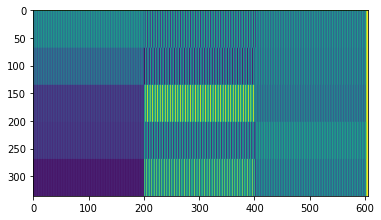

In [15]:
from skimage import data
from skimage.transform import rescale
from skimage.util import img_as_float
from skimage.io import imread
from skimage.util import img_as_ubyte

sk_image = imread(fig_name_C0) #read the image to convert to skimage ndarray
sk_image = sk_image.transpose(1,0,2).reshape(336,-1) #convert to 2D array
image = img_as_ubyte(sk_image) #Convert image to 8-bit unsigned integer format

plt.imshow(image)#.reshape(1,-1)

image = img_as_float(image)
image[3]

In [11]:
from PIL import Image
from numpy import asarray

# load the image
image = Image.open(fig_name_C0)

# convert image to numpy array
data = asarray(image)
print(type(data))

# summarize shape
print(data.shape)

# create Pillow image
image2 = Image.fromarray(data)
print(type(image2))

# summarize image details
print(image2.mode)
print(image2.size)

<class 'numpy.ndarray'>
(202, 336, 3)
<class 'PIL.Image.Image'>
RGB
(336, 202)


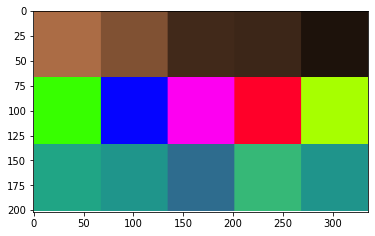

In [12]:
plt.imshow(data)